In [22]:
! wget -O img1.jpg "https://drive.google.com/uc?export=download&id=1DfTETu5Xuz9lZP7bG2FNd1sc3ANS5M6_"
! wget -O img2.jpg "https://drive.google.com/uc?export=download&id=174jvzyPTRvD9xTHttFIn1u3S3doATZ68"
! wget -O orion.jpg "https://drive.google.com/uc?export=download&id=1YpZAW3KZRjcIfdE4D1koOIeJoydHOYDM"
! wget -O point_tracker.html "https://drive.google.com/uc?export=download&id=1au-FWlvcbna05eBmoRiRLibXifwlT_vS"

--2026-02-05 20:55:56--  https://drive.google.com/uc?export=download&id=1DfTETu5Xuz9lZP7bG2FNd1sc3ANS5M6_
Resolving drive.google.com (drive.google.com)... 2607:f8b0:4009:814::200e, 142.250.190.142
Connecting to drive.google.com (drive.google.com)|2607:f8b0:4009:814::200e|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1DfTETu5Xuz9lZP7bG2FNd1sc3ANS5M6_&export=download [following]
--2026-02-05 20:55:56--  https://drive.usercontent.google.com/download?id=1DfTETu5Xuz9lZP7bG2FNd1sc3ANS5M6_&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 2607:f8b0:4009:80f::2001, 142.250.191.129
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|2607:f8b0:4009:80f::2001|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116590 (114K) [image/jpeg]
Saving to: 'img1.jpg'

     0K .......... .......... .......... .......... .......... 43% 1010K

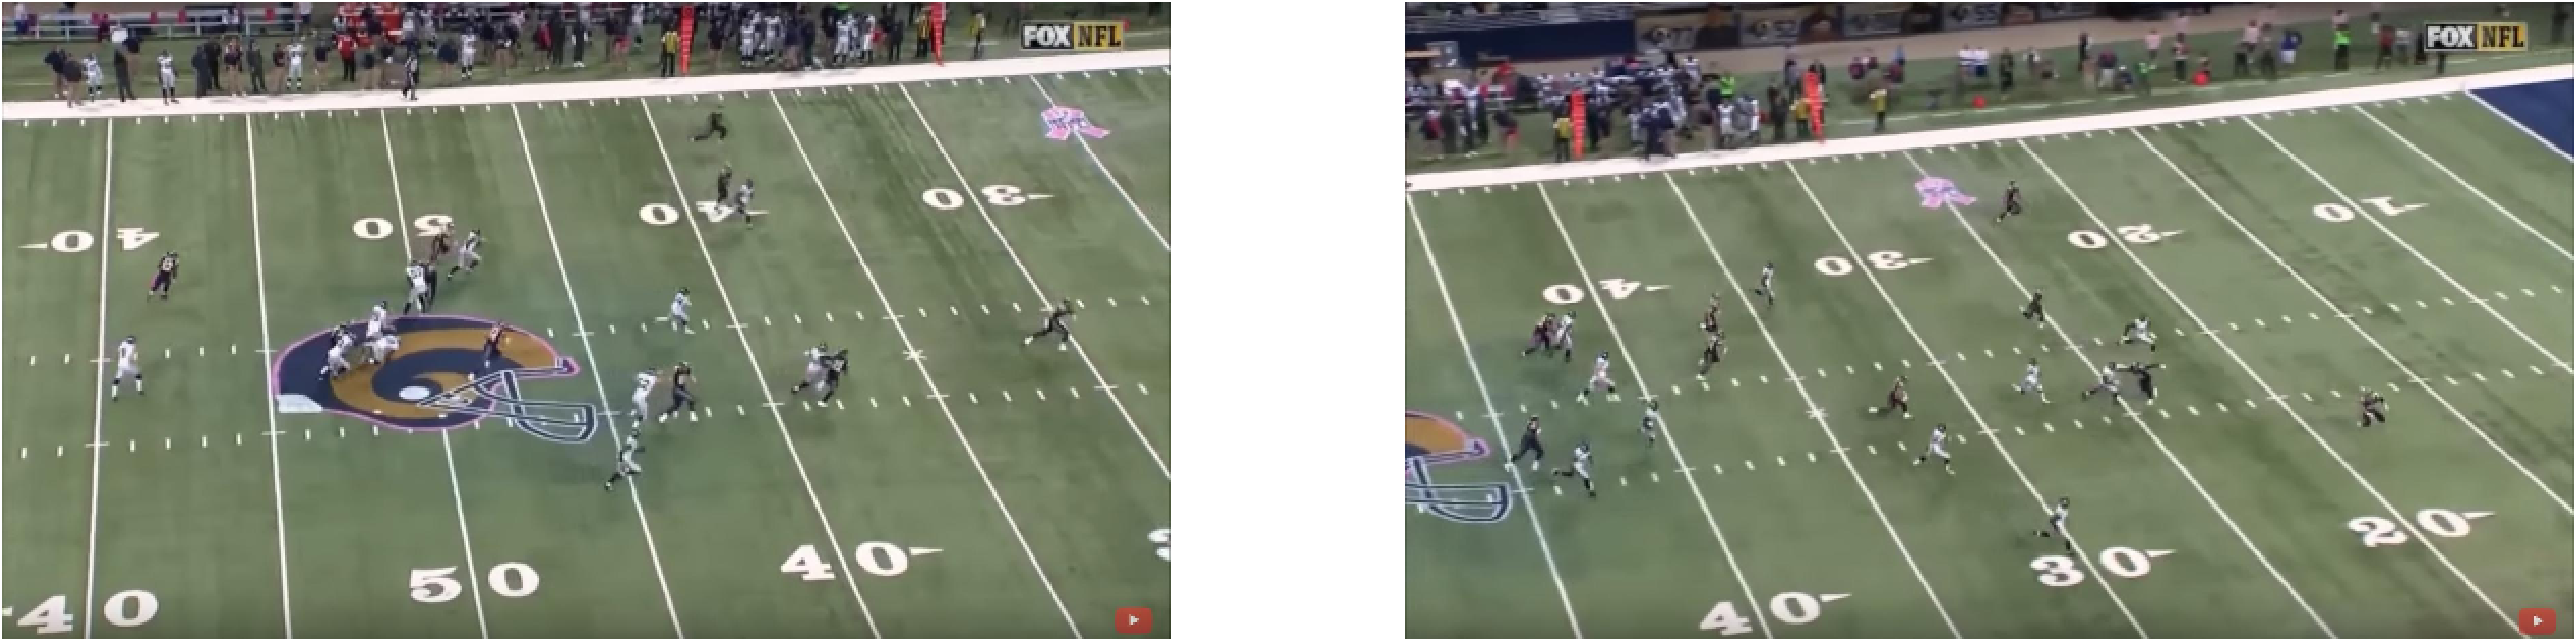

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('img1.jpg')
img2 = cv2.imread('img2.jpg')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img1 = cv2.resize(img1,(575, 313))
img2 = cv2.resize(img2,(575, 313))


def plot_imgs(img1, img2):
  fig, ax = plt.subplots(1, 2, figsize=(150, 200))
  for a in ax:
    a.set_axis_off()
  ax[0].imshow(img1)
  ax[1].imshow(img2)

plot_imgs(img1, img2)

In [24]:
import IPython

IPython.display.HTML('./point_tracker.html')

In [25]:
import numpy as np

points_img1 = np.array([[461, 266], [517, 92], [288, 199], [528, 61], [376, 101]])
points_img2 = np.array([[217, 291], [260, 124], [49, 238], [268, 97], [130, 138]])

A_rows = []
for i in range(5):
    x, y= points_img1[i]
    xp, yp = points_img2[i]
    row1 = [x, y, 1, 0, 0, 0, -x*xp, -y*xp]  
    row2 = [0, 0, 0, x, y, 1, -x*yp, -y*yp]  
    A_rows.append(row1)
    A_rows.append(row2)
A = np.array(A_rows)
print("A is:")
print(A)

y = points_img2.flatten().reshape(-1, 1)
print("y is:")
print(y)
# SVD to sovle
U, s, Vt = np.linalg.svd(A, full_matrices=False)
x = Vt.T @ np.linalg.inv(np.diag(s)) @ U.T @ y
h11, h12, h13, h21, h22, h23, h31, h32 = x.flatten()
H = np.array([[h11, h12, h13],
              [h21, h22, h23], 
              [h31, h32, 1]])

print("H is:")
print(H)

A is:
[[    461     266       1       0       0       0 -100037  -57722]
 [      0       0       0     461     266       1 -134151  -77406]
 [    517      92       1       0       0       0 -134420  -23920]
 [      0       0       0     517      92       1  -64108  -11408]
 [    288     199       1       0       0       0  -14112   -9751]
 [      0       0       0     288     199       1  -68544  -47362]
 [    528      61       1       0       0       0 -141504  -16348]
 [      0       0       0     528      61       1  -51216   -5917]
 [    376     101       1       0       0       0  -48880  -13130]
 [      0       0       0     376     101       1  -51888  -13938]]
y is:
[[217]
 [291]
 [260]
 [124]
 [ 49]
 [238]
 [268]
 [ 97]
 [130]
 [138]]
H is:
[[ 1.05882507e+00  3.36968505e-02 -2.60330357e+02]
 [-8.60507218e-03  1.01886465e+00  5.01954472e+01]
 [ 2.40682104e-04 -7.79465939e-05  1.00000000e+00]]


C:\Users\15603\AppData\Local\Temp\ipykernel_30712\49113704.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  line_2 = ((int(pt1[0]), int(pt1[1])), (int(pt2[0]), int(pt2[1])))


True

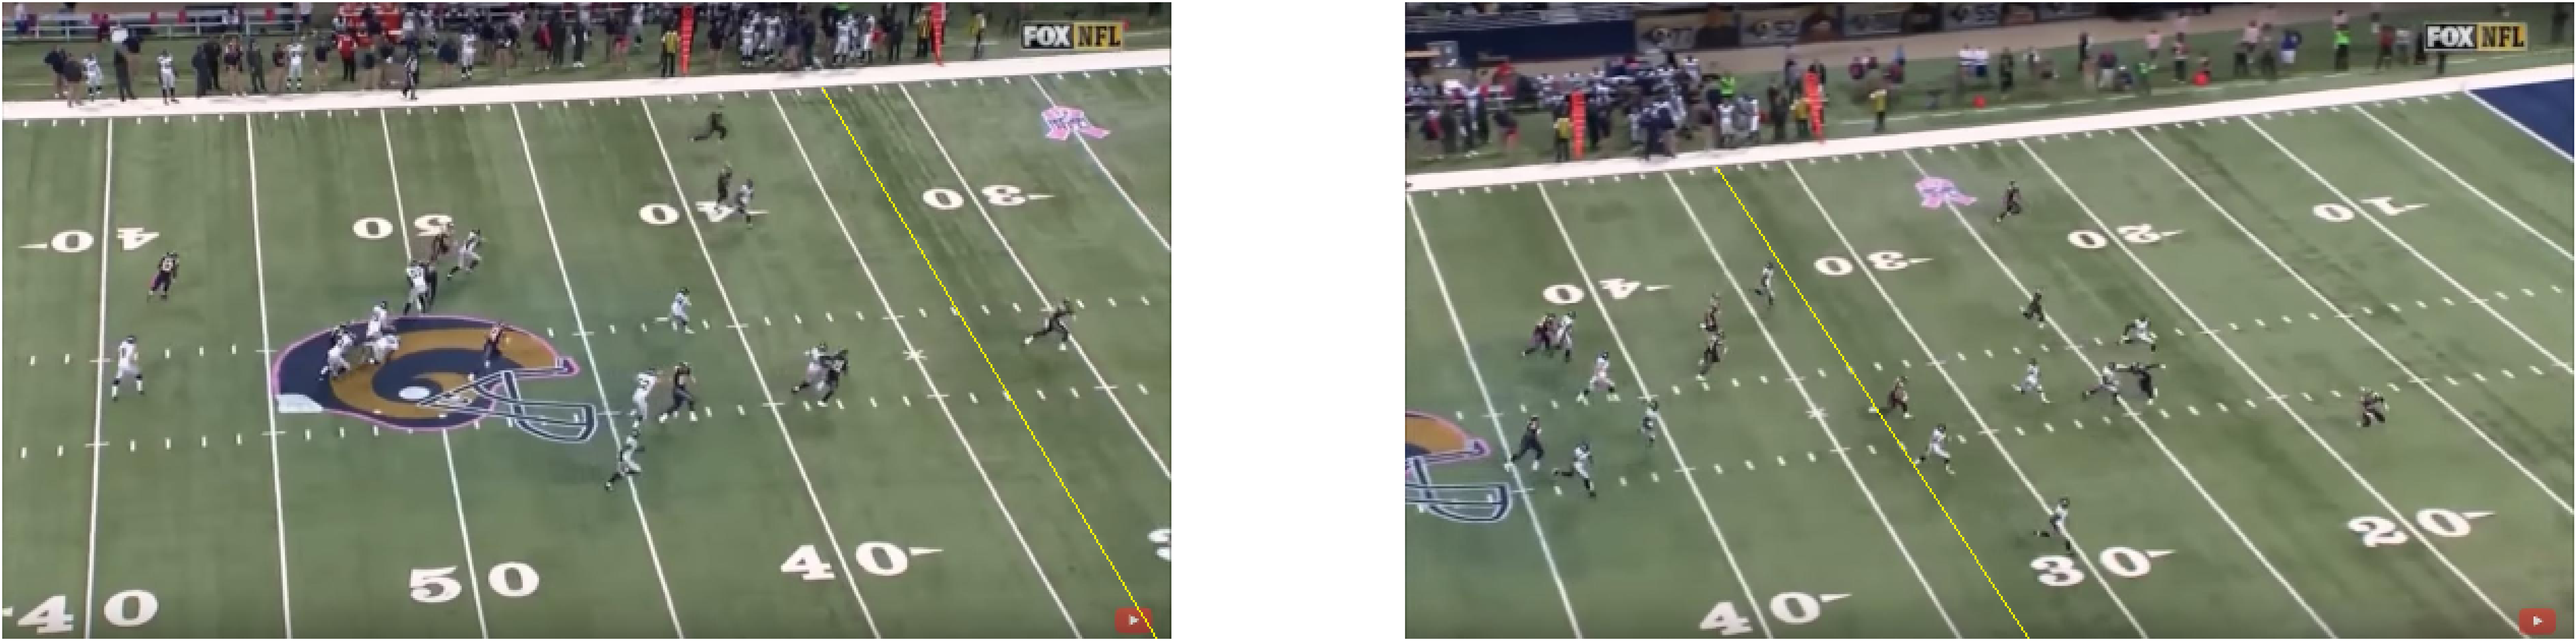

In [26]:

line_1 = ((int(1210/3), int(126/3)), (int(1701/3), int(939/3)))

#First point of second line
pt1 = H@np.array([[line_1[0][0]],[line_1[0][1]], [1]])
pt1 /= pt1[2,0]

#Second point of second line
pt2 = H@np.array([[line_1[1][0]],[line_1[1][1]], [1]])
pt2 /= pt2[2,0]

line_2 = ((int(pt1[0]), int(pt1[1])), (int(pt2[0]), int(pt2[1])))


img1 = cv2.line(img1, (line_1[0][0],line_1[0][1]), (line_1[1][0], line_1[1][1]), (255, 255, 0) , 1)
img2 = cv2.line(img2, (line_2[0][0],line_2[0][1]), (line_2[1][0],line_2[1][1]), (255, 255, 0) , 1)

plot_imgs(img1, img2)
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
cv2.imwrite('img1_wy.jpg', img1_rgb)
cv2.imwrite('img2_wy.jpg', img2_rgb)

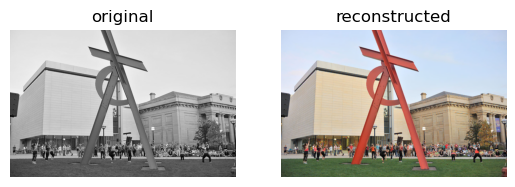

In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def bayer_filter(img):
  # function bayer_filter filters an input color image I
  # by the Bayer pattern as below, and outputs a filtered color
  # image I and a gray scaled image I_gray in which the
  # value of every pixel is the intensity of corresponding
  # color.
  # b | g
  # -----
  # g | r
  rows, cols, _ = img.shape
  colored = img.copy()

  mask = np.zeros((2,2,3))
  mask[0,0,:] = [0,0,1] #blue
  mask[0,1,:] = [0,1,0] #green
  mask[1,0,:] = [0,1,0] #green
  mask[1,1,:] = [1,0,0] #red

  for row in range(rows):
    mask_row = row%2
    for col in range(cols):
      mask_col = col%2
      colored[row, col, :] = colored[row, col, :]* mask[mask_row, mask_col, :]
  gray = colored[:, :, 0] + colored[:, :, 1] + colored[:, :, 2]
  return colored, gray

def demosaic(bayer_image):
    height, width = bayer_image.shape
    bgr_image = np.zeros((height, width, 3), dtype=np.float32)
    
    for i in range(height):
        for j in range(width):
            if i%2 == 0:
                if j%2 == 0: 
                    bgr_image[i, j, 2] = bayer_image[i, j] 
                else:          
                    bgr_image[i, j, 1] = bayer_image[i, j] 
            else:
                if j%2 == 0: 
                    bgr_image[i, j, 1] = bayer_image[i, j] 
                else:          
                    bgr_image[i, j, 0] = bayer_image[i, j] 
                    
    #Green interpolation
    for i in range(height):
        for j in range(width):
            if (i + j)% 2 != 1: 
                neighbors = []
                for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
                    ni, nj = i+dx, j+dy
                    if 0 <= ni <height and 0 <= nj < width:
                        neighbors.append(bgr_image[ni, nj, 1])
                bgr_image[i, j, 1] = np.mean(neighbors)
                
    #Blue and red interpolation
    for i in range(height):
        for j in range(width):
            for color in [0, 2]: # 0:B, 2:R
                if bgr_image[i, j, color] == 0:
                    neighbors = []
                    for di in [-1, 0, 1]:
                        for dj in [-1, 0, 1]:
                            ni, nj =i+di, j+dj
                            #Constrian in domain
                            if 0 <= ni < height and 0 <= nj < width:
                                if color == 2:  
                                     is_original = (ni%2 == 0) and (nj%2 == 0)  
                                else:  
                                     is_original = (ni%2 == 1) and (nj%2 == 1)  
                                if is_original:
                                    neighbors.append(bgr_image[ni, nj, color])
                    if len(neighbors) > 0:
                        bgr_image[i, j, color] = np.mean(neighbors)

    return np.clip(bgr_image, 0, 255).astype(np.uint8)

color_image = cv2.imread('orion.jpg')  
colored, bayer_encoded = bayer_filter(color_image)
cv2.imwrite('grayscale.jpg', bayer_encoded)
reconstructed=demosaic(bayer_encoded) 
cv2.imwrite('reconstructed_bgr.jpg', reconstructed)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(bayer_encoded, cv2.COLOR_BGR2RGB))
plt.title("original")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(reconstructed, cv2.COLOR_BGR2RGB))
plt.title("reconstructed")
plt.axis('off')
    
plt.show()